Technical Challenge for the Data Scientist position at Volkswagen Group Services

Candidate: **Pablo Martínez Agulló**

# Part 1: Exploratory data analysis
Using the dataset with the information about Customer transactions.

Tasks:

- Load the dataset and perform basic data cleaning (e.g., handling missing values, correcting data types).

- Conduct exploratory data analysis to understand the main characteristics of the data.

- Visualize key insights using appropriate plots (e.g., histograms, bar charts, scatter plots).

## Load and clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


| Column Name        | Description                                                                                         |
|--------------------|------------------------------------------------------------------------------|
| `customer_id`       |  A unique identifier for each customer.                                     |
| `transaction_id`    |  A unique identifier for each transaction.                                  |
| `transaction_date`  |  Date on which the transaction occurred.                                    |
| `amount`            |  Monetary value of the transaction.                                         |
| `product_category`  |  Category of the product purchased  (groceries, clothing or electronics).   |
| `payment_method`    |  Method of payment used (debit card, paypal or credit card).                |
| `customer_age`      |  Age of the customer.                                                       |
| `customer_income`   |  The annual income of the customer                                          |


In [2]:
# Load and inspect
df = pd.read_csv('../data/customer_transactions_with_errors.csv')
df.head()

,customer_id,transaction_id,transaction_date,amount,product_category,payment_method,customer_age,customer_income
0,74,1001,NaN,NaN,groceries,debit card,62,47401.75
1,2,1002,2024-04-06,1493.880878,Clothing,PayPal,54,112346.73
2,44,1003,2023-09-22,1323.237903,Electronics,Debit Card,58,111438.03
3,6,1004,2024-01-20,647.237864,Clothing,Debit Card,42,50237.29
4,46,1005,2023-08-28,1385.696166,Groceries,Debit Card,47,115697.03


In [3]:
# Check data types
print(df.dtypes)
print(f"Dimensions: {df.shape}")

customer_id           int64
transaction_id        int64
transaction_date     object
amount              float64
product_category     object
payment_method       object
customer_age          int64
customer_income     float64
dtype: object
Dimensions : (1010, 8)


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


customer_id          0
transaction_id       0
transaction_date    21
amount              21
product_category     0
payment_method       0
customer_age         0
customer_income      0
dtype: int64


In [6]:
# List all unique categories in product_category
unique_product_categories = df['product_category'].unique()
print("Unique Product Categories:")
print(unique_product_categories)

# List all unique payment methods
unique_payment_methods = df['payment_method'].unique()
print("\nUnique Payment Methods:")
print(unique_payment_methods)

# Observe duplicated categories due to the lack of standarization

Unique Product Categories:
['groceries' 'Clothing' 'Electronics' 'Groceries' 'clothing' 'electronics']

Unique Payment Methods:
['debit card' 'PayPal' 'Debit Card' 'Credit Card' 'paypal' 'credit card']


In [7]:
# Correct data type
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce') #  invalid parsing will be set as NaT

# Standarize text columns lowercase for consistency
df['product_category'] = df['product_category'].str.lower()
df['payment_method'] = df['payment_method'].str.lower()
#df.head()

In [8]:
# Check data types
print(df.dtypes)
print("Dimensions :" +str(df.shape))

customer_id                  int64
transaction_id               int64
transaction_date    datetime64[ns]
amount                     float64
product_category            object
payment_method              object
customer_age                 int64
customer_income            float64
dtype: object
Dimensions :(1010, 8)


In [9]:
unique_product_categories = df['product_category'].unique()
print("Unique Product Categories:")
print(unique_product_categories)
unique_payment_methods = df['payment_method'].unique()
print("\nUnique Payment Methods:")
print(unique_payment_methods)

Unique Product Categories:
['groceries' 'clothing' 'electronics']

Unique Payment Methods:
['debit card' 'paypal' 'credit card']


The data type of the dates is fixed: transaction_date is now datetime64[ns] instead of object.

The unique labels for Product Categories and Payment Methods are now corrected (having only 3 instead of 6).


The information about transaction_date and amount is missing for 21 interactions. 
We could either remove the entire row or fill in the missing information with the median (a common strategy when these values do not have any significant outliers).

In [10]:
# Test: Filling empty values with median
if False:
    df_filled = df.copy() 
    median_date = df_filled['transaction_date'].median()
    df_filled['transaction_date'].fillna(median_date, inplace=True)

    median_amount = df_filled['amount'].median()
    df_filled['amount'].fillna(median_amount, inplace=True)

    df_filled.head()


In [11]:
# Removing uncompeted entries
df_clean = df.copy()
df_clean.dropna(inplace=True)
missing_values = df_clean.isnull().sum()
print(missing_values)
print("Dimensions :" +str(df_clean.shape))

customer_id         0
transaction_id      0
transaction_date    0
amount              0
product_category    0
payment_method      0
customer_age        0
customer_income     0
dtype: int64
Dimensions :(989, 8)


## Exploratory analysis and visualization

###

An initial exploration using the functions describe() and producing several plots

In [12]:
df_clean.describe()

,customer_id,transaction_id,transaction_date,amount,customer_age,customer_income
count,989.000000,989.000000,989,989.000000,989.000000,989.000000
mean,51.189080,1496.495450,2024-01-22 16:47:33.791708672,988.841729,43.628918,71141.640121
min,1.000000,1002.000000,2023-07-31 00:00:00,248.789798,18.000000,20111.770000
25%,28.000000,1244.000000,2023-10-22 00:00:00,733.200329,31.000000,46407.070000
50%,53.000000,1496.000000,2024-01-20 00:00:00,982.027657,43.000000,70481.600000
75%,75.000000,1748.000000,2024-04-24 00:00:00,1252.443139,57.000000,96152.290000
max,100.000000,2000.000000,2024-07-29 00:00:00,1679.681855,69.000000,119941.300000
std,28.358778,291.310937,NaN,333.239302,15.024232,28889.574858


Observe that the data spans over a year, from 2023-07-31 to 2024-07-29

In [13]:
# Find the customer_id that is repeated the most times
most_frequent_customer = df_clean['customer_id'].value_counts().idxmax()

# Find the count of this customer_id
most_frequent_customer_count = df_clean['customer_id'].value_counts().max()

# Display the result
print(f"The customer_id repeated the most times is {most_frequent_customer} with {most_frequent_customer_count} occurrences.")

The customer_id repeated the most times is 8 with 20 occurrences.


In [14]:
# Checking if customer_age refers to the current age or to the age at the time of the transaction:
customer_transactions = df_clean[df_clean['customer_id'] == most_frequent_customer]
customer_transactions_sorted = customer_transactions.sort_values(by='transaction_date')
earliest_transaction = customer_transactions_sorted.head(1)
latest_transaction = customer_transactions_sorted.tail(1)
# Display the earliest and latest transactions
print("Earliest transaction:")
print(earliest_transaction)

print("\nLatest transaction:")
print(latest_transaction)

Earliest transaction:
     customer_id  transaction_id transaction_date     amount product_category  \
682            8            1683       2023-08-06  398.08972      electronics   

    payment_method  customer_age  customer_income  
682     debit card            50          28825.7  

Latest transaction:
     customer_id  transaction_id transaction_date      amount  \
504            8            1505       2024-07-07  253.611245   

    product_category payment_method  customer_age  customer_income  
504         clothing    credit card            20         22226.92  


Warning: For the same customer, we see two very different ages. Therefore, some information has not been correctly inserted in the Customer transactions dataset.

In [15]:
df_clean.describe(include=['object'])

,product_category,payment_method
count,989,989
unique,3,3
top,electronics,paypal
freq,350,341


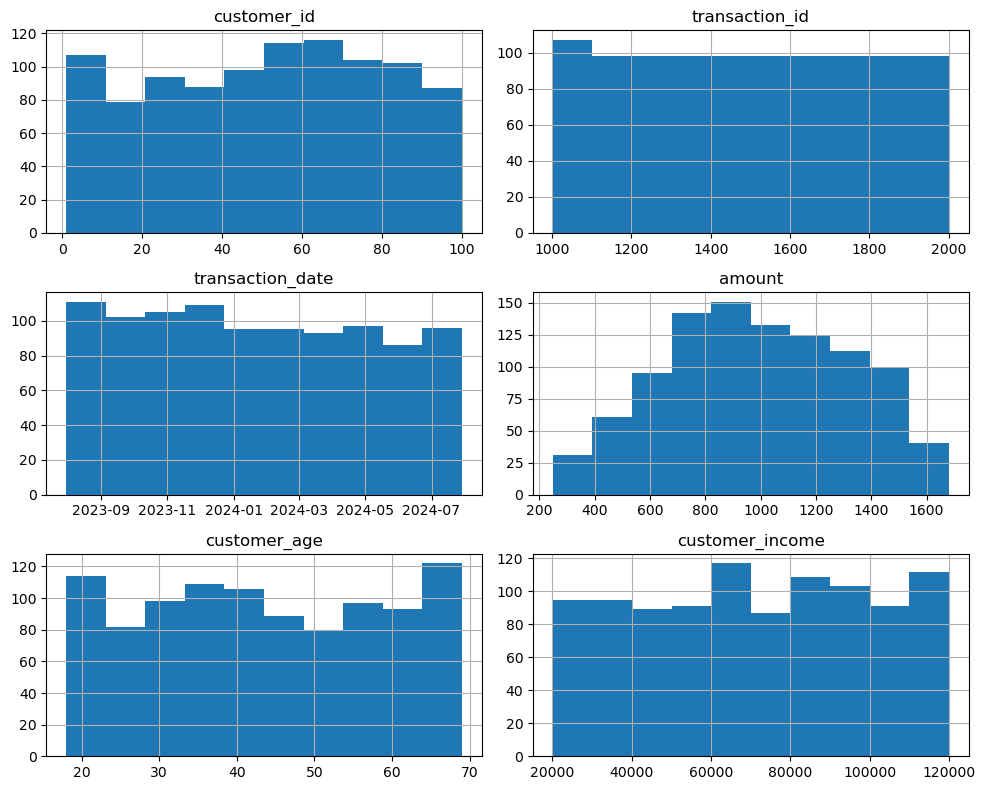

In [16]:
# Ploting histograms for all numerical variables 
df_clean.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

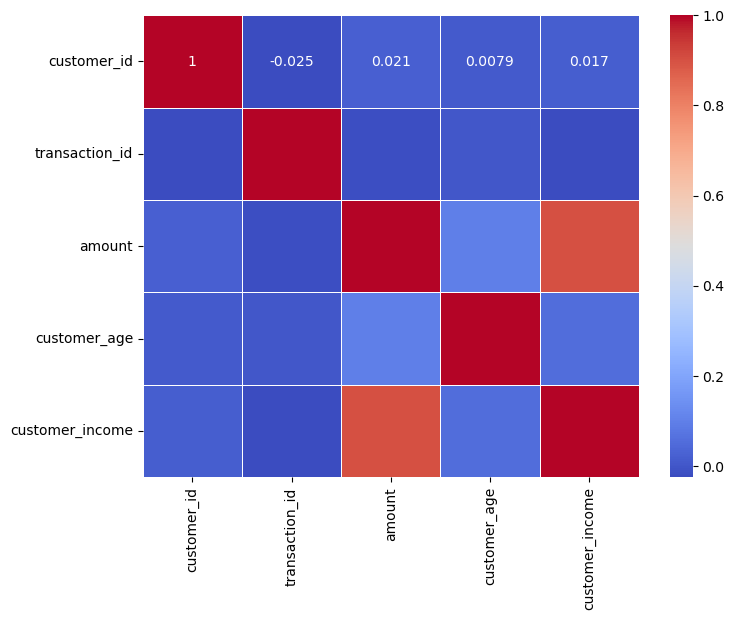

In [17]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['number'])

# Plot a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

As the plot indicates, the customer income and the amount are correlated. 
It is also interesting the fact that the customer_id and customer_income are not related at all, suggesting that 

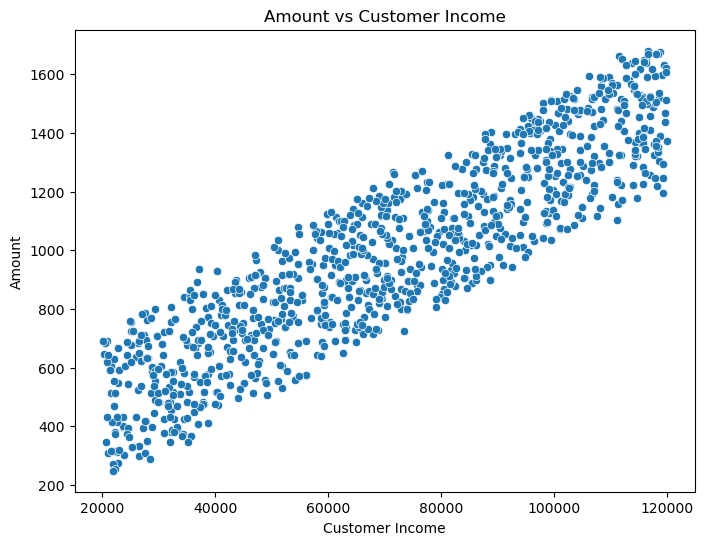

In [18]:
# Scatter plot: amount vs customer_income 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer_income', y='amount', data=df_clean)
plt.title('Amount vs Customer Income')
plt.xlabel('Customer Income')
plt.ylabel('Amount')
plt.show()


if False: # Test to check uncorrelated variables
    # Scatter plot: age vs customer_income
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='customer_income', y='customer_age', data=df_clean)
    plt.title('Age vs Customer Income')
    plt.xlabel('Customer Income')
    plt.ylabel('Customer Age')
    plt.show()

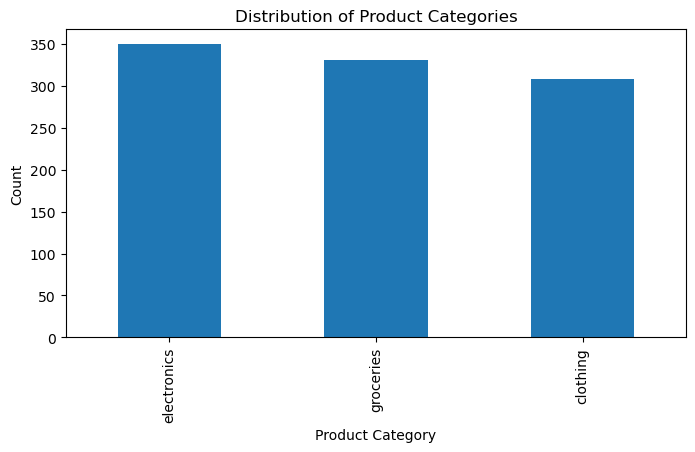

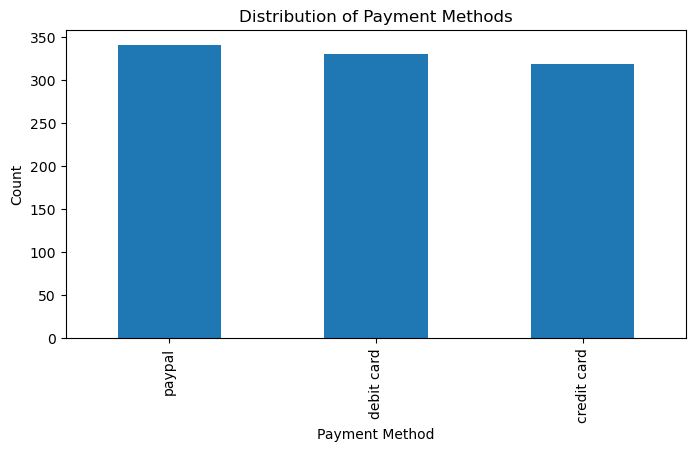

In [19]:
#Distribution of Categorical Features

# product_category
plt.figure(figsize=(8, 4))
df_clean['product_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# payment_method
plt.figure(figsize=(8, 4))
df_clean['payment_method'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

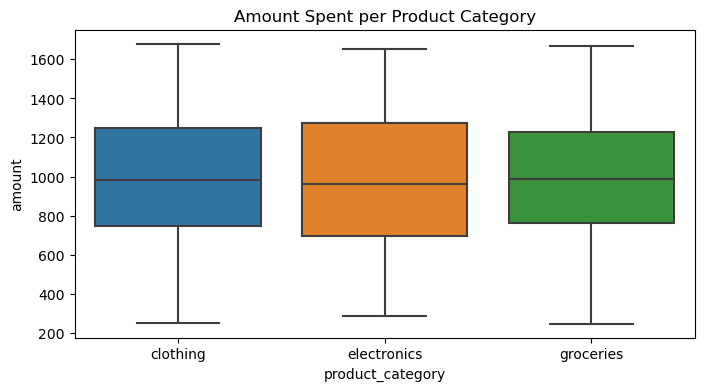

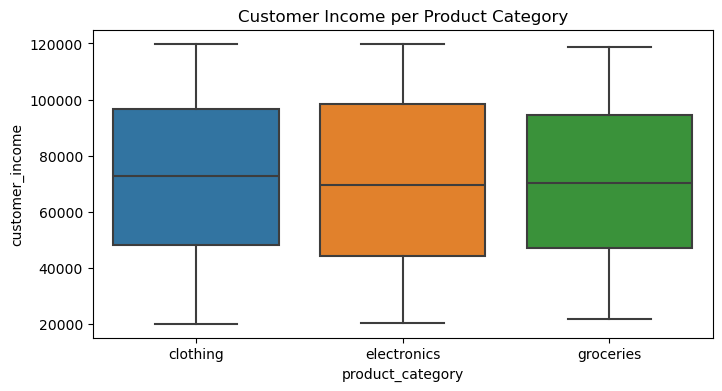

In [20]:
# Boxplots

# amount
plt.figure(figsize=(8, 4))
sns.boxplot(x='product_category', y='amount', data=df_clean)
plt.title('Amount Spent per Product Category')
plt.show()

# customer_income
plt.figure(figsize=(8, 4))
sns.boxplot(x='product_category', y='customer_income', data=df_clean)
plt.title('Customer Income per Product Category')
plt.show()

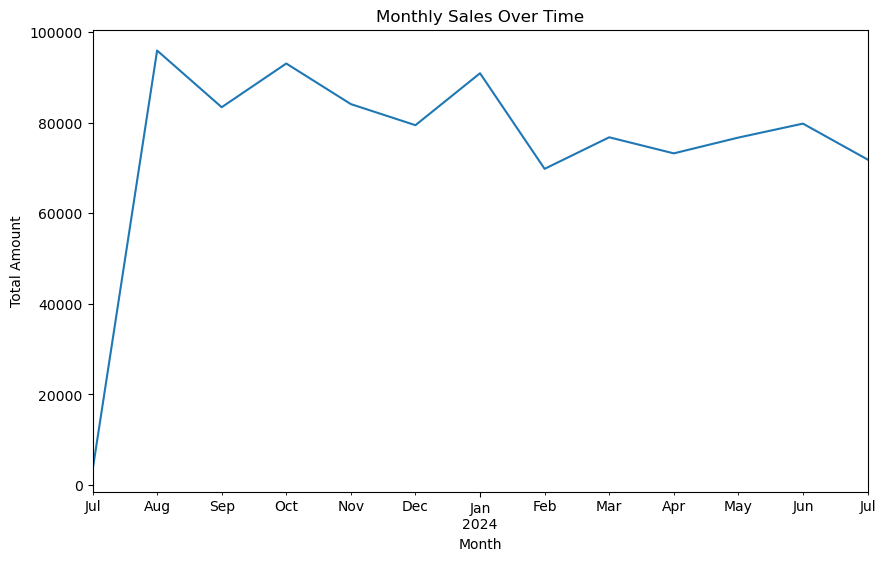

In [21]:
# Time series analysis

# Group data by month and plot the total amount
df_clean['transaction_date'] = pd.to_datetime(df_clean['transaction_date'])
monthly_sales = df_clean.resample('M', on='transaction_date').sum()['amount']


plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()


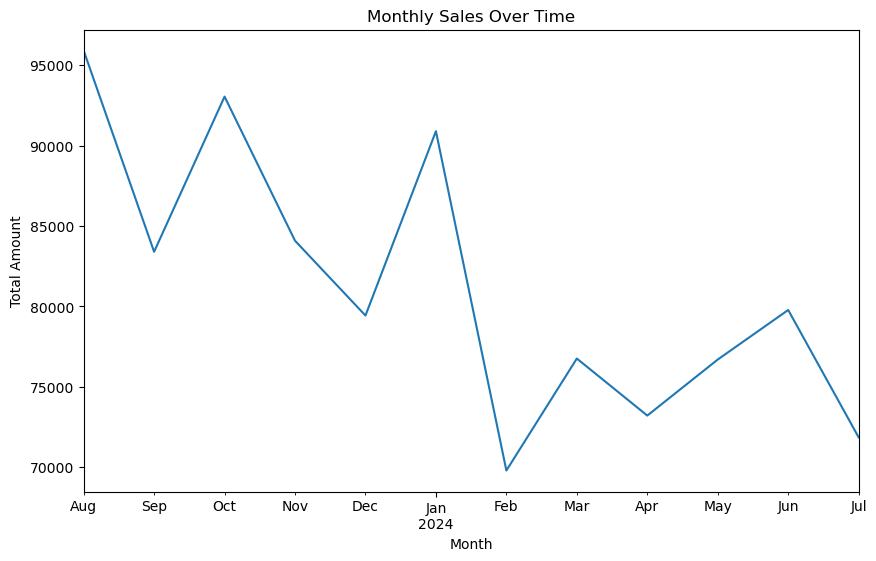

In [22]:
# Filter out July 2023 data (only one entry)
monthly_sales = monthly_sales[~monthly_sales.index.isin([pd.Timestamp('2023-07-31')])]


plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()


In [23]:
if False: #Just some tests
    # Customer segmentation
    # Age distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean['customer_age'], bins=20, kde=True)
    plt.title('Customer Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    # Income distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean['customer_income'], bins=20, kde=True)
    plt.title('Customer Income Distribution')
    plt.xlabel('Income')
    plt.ylabel('Count')
    plt.show()

# Part 2: Predictive modeling
Tasks:

- Identify a target variable for prediction (e.g., predicting customer churn, transaction amount).

- Develop a predictive model using an appropriate machine learning algorithm.

- Evaluate the model's performance using relevant metrics (e.g., accuracy, precision, recall, RMSE).

In [24]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


## Understand the churn
The first step in predictive modeling is to choose a target variable. Two options are propossed:

 - Customer churn: whenever the customer leaves the service
 
 - Transaction amount
 
Let's first explore the behavior of churn.

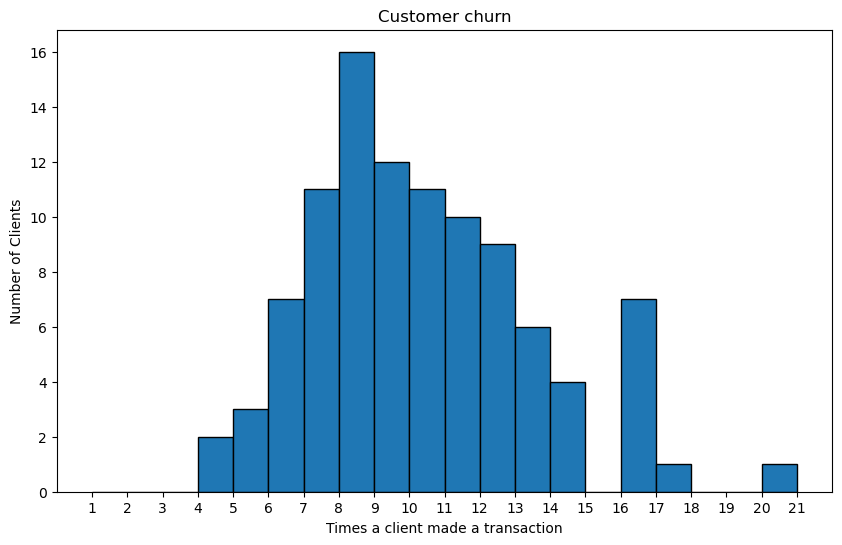

In [25]:
# Count the occurrences of each customer_id
customer_counts = df_clean['customer_id'].value_counts()

# Create a histogram of the counts
plt.figure(figsize=(10, 6))
plt.hist(customer_counts, bins=range(1, 22), edgecolor='black')  # bins range from 1 to 21

# Plot
plt.title('Customer churn')
plt.xlabel('Times a client made a transaction')
plt.ylabel('Number of Clients')
plt.xticks(range(1, 22))  

plt.show()

It can be seen that all clients had made several transactions within the service. The most common value is 9 and the max 20. We can fit the above histogram to a Gaussian distribution:

 - Black: Gaussian curve fit to the entire dataset.
 
 - Red: Gaussian curve fit only to the data where the number of customer appearances is less than or equal to 16.

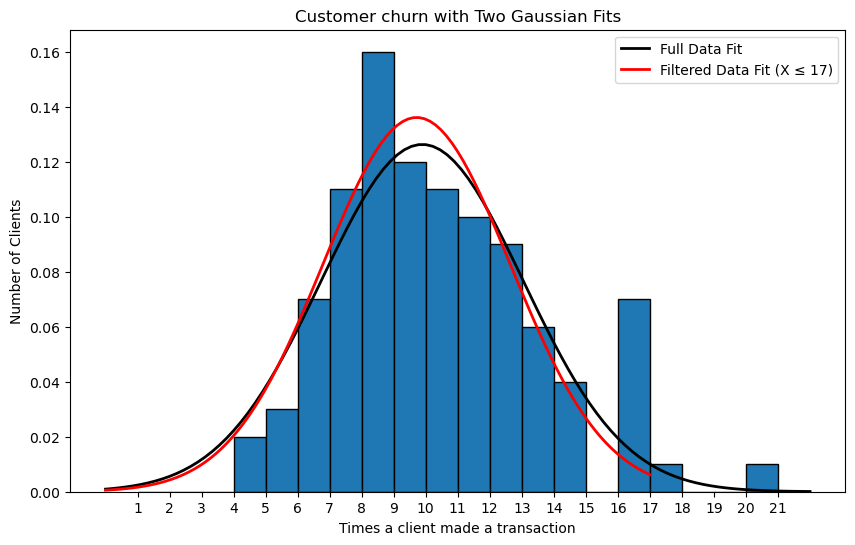

In [26]:
# Gaussian fit
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(customer_counts, bins=range(1, 22), edgecolor='black', density=True)

mu_full, std_full = norm.fit(customer_counts)

xmin, xmax = plt.xlim()
x_full = np.linspace(xmin, xmax, 100)
p_full = norm.pdf(x_full, mu_full, std_full)
plt.plot(x_full, p_full, 'k', linewidth=2, label='Full Data Fit')

# Step 4: Fit the second Gaussian distribution only to data with X <= 17
filtered_counts = customer_counts[customer_counts <= 16]
mu_filtered, std_filtered = norm.fit(filtered_counts)

# Plot the second Gaussian fit
x_filtered = np.linspace(xmin, 17, 100)
p_filtered = norm.pdf(x_filtered, mu_filtered, std_filtered)
plt.plot(x_filtered, p_filtered, 'r', linewidth=2, label='Filtered Data Fit (X ≤ 17)')

# Customize the plot
plt.title('Customer churn with Two Gaussian Fits')
plt.xlabel('Times a client made a transaction')
plt.ylabel('Number of Clients')
plt.xticks(range(1, 22))  
plt.legend()

# Show the plot
plt.show()

## Define customer churn

The first step is to define criteria in the dataset to label a client as churned.
Defining customer churn based on "no transactions within a specific time frame" is a common approach.



In [27]:
df_clean = df_clean.sort_values(by=['customer_id', 'transaction_date'])

# time difference between consecutive transactions
df_clean['prev_transaction_date'] = df_clean.groupby('customer_id')['transaction_date'].shift(1)
df_clean['days_between_transactions'] = (df_clean['transaction_date'] - df_clean['prev_transaction_date']).dt.days

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


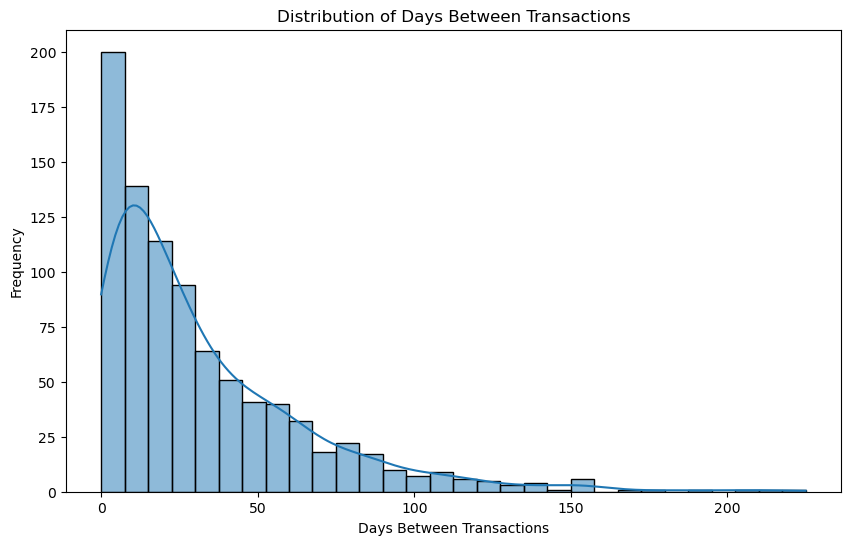

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['days_between_transactions'], bins=30, kde=True)
plt.title('Distribution of Days Between Transactions')
plt.xlabel('Days Between Transactions')
plt.ylabel('Frequency')
plt.show()

In [29]:
# Calculate the 75th percentile (Q3)
days_75th_percentile = df_clean['days_between_transactions'].quantile(0.75)
print(f"The 75th percentile (Q3) of days_between_transactions is: {days_75th_percentile} days")

The 75th percentile (Q3) of days_between_transactions is: 46.0 days


In [30]:
customer_transaction_freq = df_clean.groupby('customer_id')['days_between_transactions'].mean().reset_index()
customer_transaction_freq.rename(columns={'days_between_transactions': 'avg_days_between_transactions'}, inplace=True)
overall_avg_transaction_freq = customer_transaction_freq['avg_days_between_transactions'].mean()
median_transaction_freq = customer_transaction_freq['avg_days_between_transactions'].median()

customer_transaction_freq.head()

,customer_id,avg_days_between_transactions
0,1,46.285714
1,2,36.250000
2,3,64.800000
3,4,19.545455
4,5,29.200000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


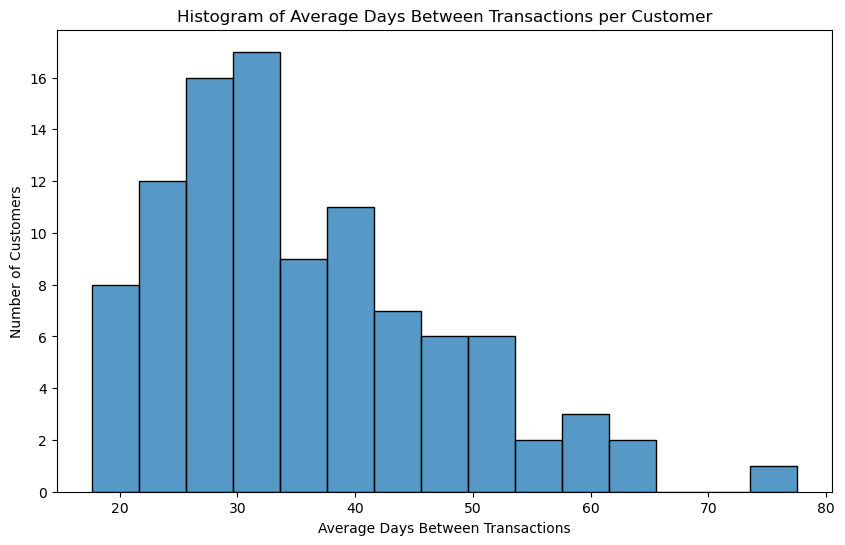

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_transaction_freq['avg_days_between_transactions'], bins=15, kde=False)
plt.title('Histogram of Average Days Between Transactions per Customer')
plt.xlabel('Average Days Between Transactions')
plt.ylabel('Number of Customers')
plt.show()

In [32]:
print(f"Overall average transaction frequency: {overall_avg_transaction_freq:.2f} days")
print(f"Median transaction frequency: {median_transaction_freq:.2f} days")

Overall average transaction frequency: 35.75 days
Median transaction frequency: 33.33 days



- customer_transaction_freq: Average number of days between transactions for each customer.


- overall_avg_transaction_freq: Overall average transaction frequency across all customers



As an approximation, we could consider that a client has churned using the 75th percentile (Q3). Therefore, if its been more than 'days_75th_percentile' days without trasactions (46.0 days), we consider it a churn.
Choosing Q3 is an arbitrary threshold, and higher percentiles (e.g., 80th or 90th) could be used.

In [111]:
# Create df with the churn label
df_churned = df_clean.sort_values(by=['customer_id', 'transaction_date'])
df_churned['next_transaction_date'] = df_churned.groupby('customer_id')['transaction_date'].shift(-1)
df_churned['days_until_next_transaction'] = (df_churned['next_transaction_date'] - df_churned['transaction_date']).dt.days
df_churned['churn'] = (df_churned['days_until_next_transaction'] > days_75th_percentile).astype(int)
df_churned = df_churned.dropna(subset=['days_until_next_transaction'])
df_churned.head()
# 1: Customer is considered to have churned after this transaction
# 0: Customer is not considered to have churned after this transaction



,customer_id,transaction_id,transaction_date,amount,product_category,payment_method,customer_age,customer_income,prev_transaction_date,days_between_transactions,next_transaction_date,days_until_next_transaction,churn
505,1,1506,2023-08-15,1405.225097,clothing,paypal,35,100899.59,NaT,NaN,2023-08-23,8.0,0
945,1,1946,2023-08-23,1129.749365,electronics,paypal,44,60415.45,2023-08-15,8.0,2023-08-27,4.0,0
916,1,1917,2023-08-27,1026.126745,groceries,paypal,32,85521.72,2023-08-23,4.0,2023-09-07,11.0,0
153,1,1154,2023-09-07,976.755069,clothing,debit card,23,73125.47,2023-08-27,11.0,2023-11-12,66.0,1
503,1,1504,2023-11-12,537.793740,electronics,debit card,46,29220.54,2023-09-07,66.0,2024-01-05,54.0,1


## Predict customer churn
There are several ML methods that are well-suited for time series analysis.

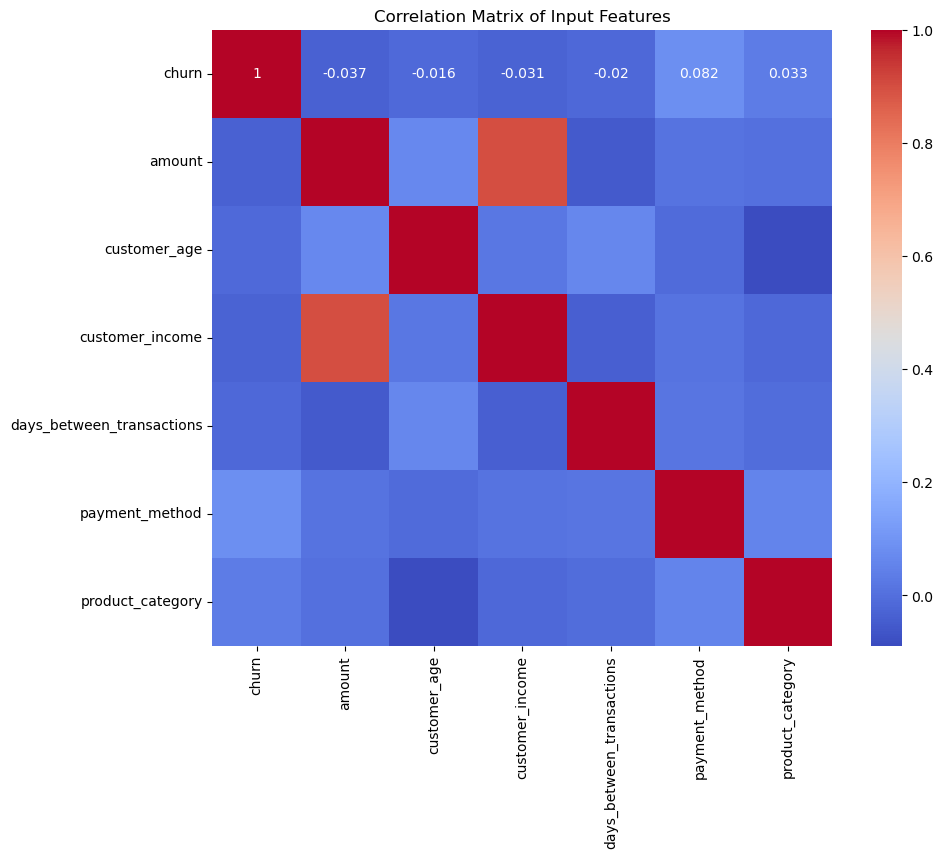

In [34]:
# Prepare the data for modeling
df_churned.dropna(inplace=True) 

# Encode categorical variables
label_encoders = {}
for col in ['product_category', 'payment_method']:
    le = LabelEncoder()
    df_churned[col] = le.fit_transform(df_churned[col])
    label_encoders[col] = le


scaler = MinMaxScaler() # Normalize numerical features for LSTM model
df_churned[['amount', 'customer_age', 'customer_income', 'days_between_transactions']] = scaler.fit_transform(
    df_churned[['amount', 'customer_age', 'customer_income', 'days_between_transactions']])



# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df_churned[['churn','amount', 'customer_age', 'customer_income', 'days_between_transactions', 'payment_method', 'product_category']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Input Features')
plt.show()



The only correlated variables are the customer income and the amount of transaction

In [35]:
# Feautures and labels
X = df_churned.drop(['churn', 'customer_id', 'days_until_next_transaction', 'next_transaction_date', 'transaction_id'], axis=1)
y = df_churned['churn']
print(X.columns.values.tolist())

['transaction_date', 'amount', 'product_category', 'payment_method', 'customer_age', 'customer_income', 'prev_transaction_date', 'days_between_transactions']


### Approach 1: LSTMs

LSTM networks are probably the most popular ones. While LSTMs can capture dependencies over time, they need a relatively large amount of data to train.

In [159]:
# Convert the 'transaction_date' and 'prev_transaction_date' to numeric format (e.g., days since a reference date)

df_churned['transaction_date'] = (pd.to_datetime(df_churned['transaction_date']) - pd.Timestamp("2023-01-01")).dt.days
df_churned['prev_transaction_date'] = (pd.to_datetime(df_churned['prev_transaction_date']) - pd.Timestamp("2023-01-01")).dt.days

# Prepare data for LSTM
def create_sequences(data, target, sequence_length=5):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(target[i + sequence_length])
    return np.array(sequences), np.array(targets)

features = ['amount', 'product_category', 'payment_method', 'customer_age', 'customer_income', 'days_between_transactions']
X_seq, y_seq = create_sequences(X[features].values, y.values, sequence_length=5)

# Split into train and test sets (80% / 20%)
split = int(0.8 * len(X_seq))
X_train_lstm, X_test_lstm = X_seq[:split], X_seq[split:]
y_train_lstm, y_test_lstm = y_seq[:split], y_seq[split:]

# Check shapes for debugging
print(f"X_train_lstm shape before reshape: {X_train_lstm.shape}")
print(f"X_test_lstm shape before reshape: {X_test_lstm.shape}")

# Reshape input to be 3D [samples, timesteps, features]
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2]))

# Check shapes after reshape
print(f"X_train_lstm shape after reshape: {X_train_lstm.shape}")
print(f"X_test_lstm shape after reshape: {X_test_lstm.shape}")




X_train_lstm shape before reshape: (627, 5, 6)
X_test_lstm shape before reshape: (157, 5, 6)
X_train_lstm shape after reshape: (627, 5, 6)
X_test_lstm shape after reshape: (157, 5, 6)


In [53]:
# Check for class imbalances
churn_0_count = np.sum(y == 0)
churn_1_count = np.sum(y == 1)

total_count = len(y)
churn_0_percentage = (churn_0_count / total_count) * 100
churn_1_percentage = (churn_1_count / total_count) * 100

print(f"Churn = 0: {churn_0_count} entries ({churn_0_percentage:.2f}%)")
print(f"Churn = 1: {churn_1_count} entries ({churn_1_percentage:.2f}%)")

Churn = 0: 593 entries (75.16%)
Churn = 1: 196 entries (24.84%)


In [54]:
# Incorporating class weighting to address the slight class imbalance
from sklearn.utils.class_weight import compute_class_weight 
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_lstm), y=y_train_lstm)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}


In [55]:
def create_lstm_model(lstm_units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(lstm_units, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

Implement a grid search to optimise the hyperparameters of the LSTM model. Optimisation based on the KerasClassifier

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras import Input


In [107]:
# Custom wrapper class (because ModuleNotFoundError: No module named 'tensorflow.keras.wrappers')
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lstm_units=50, dropout_rate=0.2, optimizer='adam', epochs=10, batch_size=32):
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.optimizer = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        self.classes_ = np.array([0, 1])  # Define classes_ attribute

    def build_model(self):
        model = Sequential()
        model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
        model.add(LSTM(self.lstm_units, return_sequences=True))
        #model.add(LSTM(self.lstm_units, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
        model.add(Dropout(self.dropout_rate))
        model.add(LSTM(self.lstm_units))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(optimizer=self.optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y, **kwargs):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, **kwargs)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

    def predict_proba(self, X):
        proba = self.model.predict(X)
        return np.hstack([(1 - proba), proba])

In [109]:
RunGridSearch = False

if RunGridSearch == True:
    # Wrap the model using KerasClassifier
    model = KerasClassifierWrapper()

    # Define the hyperparameter grid
    param_grid = {
        'lstm_units': [50, 100, 150],
        'dropout_rate': [0.2, 0.3, 0.4],
        'batch_size': [32, 64],
        'epochs': [10, 20, 30],
        'optimizer': ['adam', 'rmsprop']
    }

    # Set up GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2)

    # Perform Grid Search
    grid_result = grid.fit(X_train_lstm, y_train_lstm, class_weight=class_weights_dict)
    print("\n")

    # Print the best parameters and score
    print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

    # Evaluate the best model on the test set
    best_model = grid_result.best_estimator_
    y_pred_prob_lstm = best_model.predict(X_test_lstm)
    y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

    print("Best LSTM Model Evaluation:")
    print(classification_report(y_test_lstm, y_pred_lstm))
    print(f"ROC-AUC: {roc_auc_score(y_test_lstm, y_pred_prob_lstm)}")
else:
    print("Set RunGridSearch = True in order to run the grid search that looks for the best hyperparameters.)

Set RunGridSearch = True in order to run the grid search that looks for the best hyperparmeters


In [110]:
#print("Best LSTM Model Evaluation:")
#print(classification_report(y_test_lstm, y_pred_lstm))
#print(f"ROC-AUC: {roc_auc_score(y_test_lstm, y_pred_prob_lstm)}")

The best model according to the grid search uses the following hyperparameters

- 'batch_size': 32

- 'dropout_rate': 0.4

- 'epochs': 10

- 'lstm_units': 150

- 'optimizer': 'rmsprop'

Providing a ROC of 0.49


| Best LSTM Model Evaluation:        |               |        |          |         |
|------------------------------------|---------------|--------|----------|---------|
|                                    | precision     | recall | f1-score | support |
| No churn (0)                       | 0.75          | 0.97   | 0.85     | 118     |
| Churn (1)                          | 0.00          | 0.00   | 0.00     | 0.00    |
|                                    |               |        |          |         |
| accuracy                           |               |        | 0.73     | 157     |
| macro avg                          | 0.37          | 0.49   | 0.42     | 157     |
| weighted avg                       | 0.56          | 0.73   | 0.64     | 157     |
|                                    |               |        |          |         |
| ROC-AUC: 0.4872881355932203        |               |        |          |         |


The precision, recall, and F1-score for the 'Churn' class are all 0.00, indicating that the model fails to correctly identify any customers who churn. The low ROC value suggests that the model is not learning

### Additional ideas
To improve the models, we could create new features such as week or month, as client behaviour can be influenced by this.  

Also use other models such as XGBoost: Gradient boosting machines can be a good option when it comes to handling tabular data with a combination of time series and static features (below is the implementation for gradient boosting).

In [59]:
# implementation for gradient boosting, not used right now
if False: # set to true to use the XGBoost implementation
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X):
        X_train_xgb, X_test_xgb = X.iloc[train_index], X.iloc[test_index]
        y_train_xgb, y_test_xgb = y.iloc[train_index], y.iloc[test_index]

        # Train XGBoost
        model_xgb = xgb.XGBClassifier()
        model_xgb.fit(X_train_xgb, y_train_xgb)

        # Predict and evaluate
        y_pred_xgb = model_xgb.predict(X_test_xgb)
        y_prob_xgb = model_xgb.predict_proba(X_test_xgb)[:, 1]
        print("XGBoost Model Evaluation:")
        print(classification_report(y_test_xgb, y_pred_xgb))
        print(f"ROC-AUC: {roc_auc_score(y_test_xgb, y_prob_xgb)}")

## Understand the transaction amount
Let's explore the relation between the 'amount' variable and the rest of features

In [40]:
# Explore correlations of amount
# Set to False to make the notebook lighter
if False:
    df_clean_encoded = pd.get_dummies(df_clean, drop_first=True)  # Handling categorical variables
    columns = df_clean.columns # Get the list of columns

    for column in columns: 
        if column != 'amount':  # Exclude the target variable
            plt.figure(figsize=(10, 6))

            if pd.api.types.is_numeric_dtype(df_clean[column]):
                # Scatter plot for numerical variables
                sns.scatterplot(x=df_clean[column], y=df_clean['amount'])
                plt.title(f'Amount vs {column}')
                plt.xlabel(column)
                plt.ylabel('Amount')

            else:
                # Scatter plot for categorical variables
                sns.boxplot(x=df_clean[column], y=df_clean['amount'])
                plt.title(f'Amount vs {column}')
                plt.xlabel(column)
                plt.ylabel('Amount')

            plt.show()

The only observed correlation of the 'aumount' variable is that with the 'customer_income'

## Predict transaction amount

### Comparing different implementations

There are several possible ML-based implementations for this task. Firstly we will build a few basic models to test and compare them.

In [113]:
X = df_clean.drop(['amount', 'transaction_date'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df_clean['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Linear regression

To use when the relationship between features and the target is approximatelly linear. Its simplicity can be an advantage in terms of interpretability.


In [114]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

#### Random Forest regression

Can capture non-linear relationships

In [115]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

#### BDT regression

Typically more accurate

In [85]:
import xgboost as xgb

# XGBoost Regression
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

#### Support vector regression
<!-- Typically used when we have a lot of outlyers, not our case -->
Effective in high-dimensional spaces or when there are a lot of outliers. This is not our case.
Here the worst performance is expected but let's try it anyways.

In [106]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Feature scaling for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test_scaled)

#### Neural network regression

To use when there is a large amount of data and we expect complex relationships between features and the target.

In [107]:
from sklearn.neural_network import MLPRegressor

# Neural Network Regression
mlp_model = MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

### Evaluate models
- Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction.

- Mean Squared Error (MSE): Measures the average of the squares of the errors. It gives more weight to larger errors.

- Root Mean Squared Error (RMSE): The square root of the MSE. Sensitive to outliers.

- R² Score: Coefficient of Determination.

- Mean Absolute Percentage Error (MAPE): Measures the accuracy of a forecasting method in predicting values.

- Median Absolute Error: Measures the median of the absolute errors. Less sensitive to outliers.

In [125]:
# Function to evaluate and print metrics
def evaluate_model(y_test, y_pred, model_name):
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
    r2 = round(r2_score(y_test, y_pred), 4)
    mape = round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 2)
    median_ae = round(median_absolute_error(y_test, y_pred), 2)
    
    print(f"{model_name} Performance:")
    print(f"  MAE: {mae}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  R² Score: {r2}")
    print(f"  MAPE: {mape}%")
    print(f"  Median Absolute Error: {median_ae}")
    print("\n")

# Linear Regression
y_pred_lr = lr_model.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Random Forest Regression
y_pred_rf = rf_model.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# XGBoost Regression
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "XGBoost Regression")

# Support Vector Regression
y_pred_svr = svr_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_svr, "Support Vector Regression")

# Neural Network Regression
y_pred_mlp = mlp_model.predict(X_test)
evaluate_model(y_test, y_pred_mlp, "Neural Network (MLP) Regression")


Linear Regression Performance:
  MAE: 121.44
  MSE: 19979.74
  RMSE: 141.35
  R² Score: 0.8158
  MAPE: 14.72%
  Median Absolute Error: 114.83


Random Forest Regression Performance:
  MAE: 126.99
  MSE: 22709.51
  RMSE: 150.7
  R² Score: 0.7906
  MAPE: 15.22%
  Median Absolute Error: 117.76


XGBoost Regression Performance:
  MAE: 134.97
  MSE: 26853.5
  RMSE: 163.87
  R² Score: 0.7524
  MAPE: 16.05%
  Median Absolute Error: 124.1


Support Vector Regression Performance:
  MAE: 260.65
  MSE: 97412.64
  RMSE: 312.11
  R² Score: 0.1019
  MAPE: 33.45%
  Median Absolute Error: 235.0


Neural Network (MLP) Regression Performance:
  MAE: 127.63
  MSE: 22823.34
  RMSE: 151.07
  R² Score: 0.7896
  MAPE: 15.39%
  Median Absolute Error: 115.61




Before any optimisation, the linear regression appears to have the best performance. Nevertheless, both the Random Forest (RF) and the Neural Networks (NN) present a comparable performance. RF and NN could be further explored with hyperparameter tuning to potentially improve their performance.

XGBoost might also benefit from hyperparameter tuning but the initial tests suggest worst performance when compared to LR, RF or NN. SVR should be deprioritized due to its poor performance.

### Genetic algorithm
Implementation of genetic algorithm (GA) to tune the hyperparameters of the ML models.
Steps

   1 Define the Population
   
   2 Evaluate Fitness
   
   3 Selection
   
   4 Crossover
   
   5 Mutation
   
   6 Repeat


In [109]:
# Using the deap library in conjugation with sklearn
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
import random

In [145]:
###########################################################
# cxDict :: Define custom crossover for dictionaries      #
###########################################################
def cxDict(ind1, ind2):
    for key in ind1.keys():
        if random.random() < 0.5:
            ind1[key], ind2[key] = ind2[key], ind1[key]
    return ind1, ind2

#############################################################################
# mutDict :: custom mutation function designed to mutate hyperparameters    #
#############################################################################
def mutDict(individual, indpb, param_ranges):
    for key in individual.keys():
        if random.random() < indpb:
            if isinstance(individual[key], int):
                individual[key] = random.randint(*param_ranges[key])
            elif isinstance(individual[key], float):
                individual[key] = random.uniform(*param_ranges[key])
            elif isinstance(param_ranges[key], list):
                individual[key] = random.choice(param_ranges[key])
    return individual,

#############################################################################
# evaluate_model ::  generic function to evaluate the fitness of a model    #
#############################################################################
def evaluate_model_ga(individual, model_class, X_train, y_train):
    model = model_class(**individual)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores),

####################################################################################
# create_ga_optimizer :: sets up and runs a GA to search for the best combination  # 
#                        of hyperparameters for a given machine learning model.    #
####################################################################################
def create_ga_optimizer(model_class, param_ranges, n_generations=50, n_population=30):
    if not hasattr(creator, "FitnessMax"):
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    if not hasattr(creator, "Individual"):
        creator.create("Individual", dict, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    
    # Attribute generator
    for key, (low, high) in param_ranges.items():
        if isinstance(low, int) and isinstance(high, int):
            toolbox.register(f"attr_{key}", random.randint, low, high)
        else:
            toolbox.register(f"attr_{key}", random.uniform, low, high)
    
    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, 
                     lambda: {k: toolbox.__getattribute__(f"attr_{k}")() for k in param_ranges.keys()})
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("evaluate", evaluate_model_ga, model_class=model_class, X_train=X_train, y_train=y_train)
    toolbox.register("mate", cxDict)
    toolbox.register("mutate", mutDict, indpb=0.1, param_ranges=param_ranges)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=n_population)
    
    hof = tools.HallOfFame(1)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_generations, 
                        stats=None, halloffame=hof, verbose=True)
    
    return hof[0]

In [ ]:
# Linear Regression :: tuning intercept
param_ranges_lr = {
    'fit_intercept': (0, 1)  # binary value, will be transformed to True/False
}


# Random Forest
param_ranges_rf = {
    'n_estimators': (10, 200),
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10)
}

# Neural Network (MLP)
param_ranges_mlp = {
    'hidden_layer_sizes': (50, 200),
    'alpha': (0.0001, 0.1),
    'learning_rate_init': (0.001, 0.1),
    'activation': ['identity', 'logistic', 'tanh', 'relu']  
}

RunGA = False
if RunGA == False:
    print("Set RunGA to True in order to run the Genetic Algorithm")
else:
    # Assuming X_train and y_train are your training data
    print("Genetic Algorithm for LinearRegression")
    best_lr_params = create_ga_optimizer(LinearRegression, param_ranges_lr)

    print("Genetic Algorithm for Random Forest")
    best_rf_params = create_ga_optimizer(RandomForestRegressor, param_ranges_rf)

    print("Genetic Algorithm for Neural Network")
    best_mlp_params = create_ga_optimizer(MLPRegressor, param_ranges_mlp)

    print("Results")
    print(" Best parameters for Linear Regression:", best_lr_params)
    print(" Best parameters for Random Forest:", best_rf_params)
    print(" Best parameters for MLP:", best_mlp_params)

The results of the genetic algorithm suggest the following hyperparmeters for our ML-tools:

- Linear Regression -> 'fit_intercept': 1

- Random Forest -> n_estimators=142, max_depth=3, min_samples_split=2, min_samples_leaf=2

- NN (MLP) -> hidden_layer_sizes=(52,100), alpha=0.0353750626156012, learning_rate_init=0.0197369974180805

Let's train the optimised models and evalute them

In [142]:
# Train
lr_model_opt = LinearRegression(fit_intercept=bool(1))  # Convert 1 to True
lr_model_opt.fit(X_train, y_train)
y_pred_lr_opt = lr_model_opt.predict(X_test)

#rf_model_opt = RandomForestRegressor(n_estimators=54, max_depth=3, min_samples_split=7, min_samples_leaf=8) #old
#rf_model_opt = RandomForestRegressor(n_estimators=75, max_depth=4, min_samples_split=14, min_samples_leaf=6)
rf_model_opt = RandomForestRegressor(n_estimators=142, max_depth=3, min_samples_split=2, min_samples_leaf=2)
rf_model_opt.fit(X_train, y_train)
y_pred_rf_opt = rf_model_opt.predict(X_test)

#mlp_model_opt = MLPRegressor(hidden_layer_sizes=(133,), alpha=0.06174083311080738, learning_rate_init=0.01933993108110883) # old model
#mlp_model_opt = MLPRegressor(hidden_layer_sizes=(150,), alpha=0.060015580739557255, learning_rate_init=0.02460461531461061)
mlp_model_opt = MLPRegressor(hidden_layer_sizes=(52,100), alpha=0.0353750626156012, learning_rate_init=0.0197369974180805)
mlp_model_opt.fit(X_train, y_train)
y_pred_mlp_opt = mlp_model_opt.predict(X_test)

In [143]:
# Evaluate
y_pred_lr_opt = lr_model_opt.predict(X_test)
evaluate_model(y_test, y_pred_lr_opt, "Optimized Linear Regression")

y_pred_rf_opt = rf_model_opt.predict(X_test)
evaluate_model(y_test, y_pred_rf_opt, "Optimized Random Forest Regression")

y_pred_mlp_opt = mlp_model_opt.predict(X_test)
evaluate_model(y_test, y_pred_mlp_opt, "Optimized Neural Network (MLP) Regression")

Optimized Linear Regression Performance:
  MAE: 121.44
  MSE: 19979.74
  RMSE: 141.35
  R² Score: 0.8158
  MAPE: 14.72%
  Median Absolute Error: 114.83


Optimized Random Forest Regression Performance:
  MAE: 124.59
  MSE: 20759.12
  RMSE: 144.08
  R² Score: 0.8086
  MAPE: 15.15%
  Median Absolute Error: 121.83


Optimized Neural Network (MLP) Regression Performance:
  MAE: 126.49
  MSE: 22433.54
  RMSE: 149.78
  R² Score: 0.7932
  MAPE: 14.45%
  Median Absolute Error: 126.03




# Part 3: Natural language processing
Using the dataset with the information about Customer reviews.
Tasks:

- Preprocess the text data (e.g., tokenization, stopword removal, stemming/lemmatization).

- Perform sentiment analysis on the reviews.

- Visualize the distribution of sentiment scores.

In [74]:
# Load and inspect
reviews_df = pd.read_csv('../data/customer_reviews_with_errors.csv')
reviews_df.head()


,review_id,customer_id,review_date,review_text
0,1,74,NaN,NaN
1,2,2,2023-10-16,"Terrible service, will not buy from here again."
2,3,44,2023-12-08,"Average quality, you get what you pay for."
3,4,6,2024-06-08,"Great product, very satisfied with the quality..."
4,5,46,2024-07-30,"Very disappointed with the product, not as des..."


- Tokenization: Break down the review text into individual words.
- Stopword Removal: Remove common words like 'the', 'is', etc., that don't contribute to the meaning.
- Stemming/Lemmatization: Reduce words to their root form.

In [77]:
# Step 1: Handle missing values by removing rows with empty 'review_text'
reviews_df.dropna(subset=['review_text'], inplace=True)

# Step 2: Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalnum() and w not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(filtered_tokens)
reviews_df['processed_review_text'] = reviews_df['review_text'].apply(preprocess_text)

reviews_df.head()

,review_id,customer_id,review_date,review_text,processed_review_text
1,2,2,2023-10-16,"Terrible service, will not buy from here again.",terrible service buy
2,3,44,2023-12-08,"Average quality, you get what you pay for.",average quality get pay
3,4,6,2024-06-08,"Great product, very satisfied with the quality...",great product satisfied quality performance
4,5,46,2024-07-30,"Very disappointed with the product, not as des...",disappointed product described
5,6,43,2023-11-16,"Excellent service, highly recommend!",excellent service highly recommend


For NLP we will be using [Natural Language Toolkit (NTLK)](https://www.nltk.org/index.html), a leading platform for building Python programs to work with human language data


In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure necessary nltk downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /Users/pablo/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/pablo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/pablo/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/pablo/nltk_data...


True

In [81]:
# Step 3: Sentiment analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

reviews_df['sentiment_score'] = reviews_df['review_text'].apply(get_sentiment_score) # Using the original text to perform nlp


In [103]:
InspectScores = False
if InspectScores == True:
    for index, row in reviews_df.iterrows():
        print(f"Review Text: {row['review_text']}")
        print(f"Sentiment Score: {row['sentiment_score']}")
        print("-" * 50)

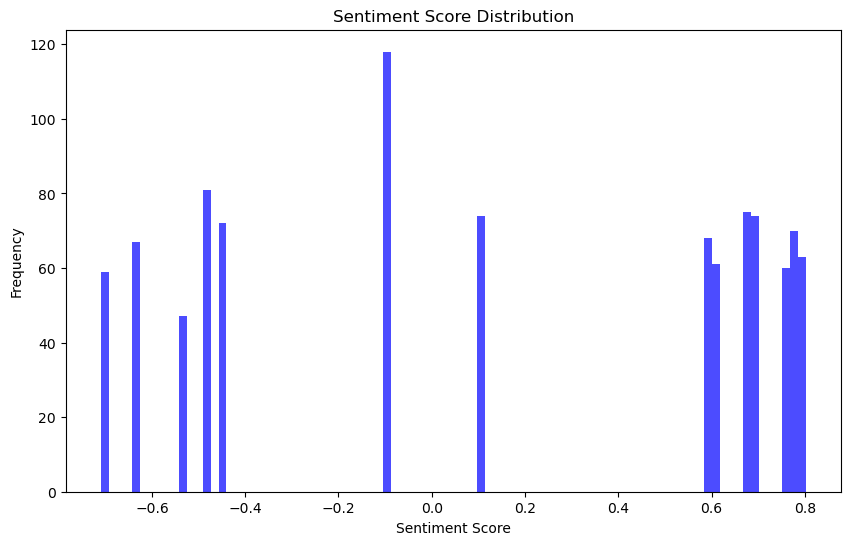

In [124]:
# Step 4: Visualize sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['sentiment_score'], bins=90, color='blue', alpha=0.7)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# change the bining

Observe how NLTK tool does not provide uniformly distributed scores, this due to the fact that the same reviews are copypasted all over the dataset. In a more realistic scenario, this distribtuon would look more uniform. 
<!-- Observe how NLTK tool did not assigned to any review values in the range [-0.4, -0.1] and [0.2, 0.5].-->
It can be seen that the majority of reviews are deemed as possitive. 

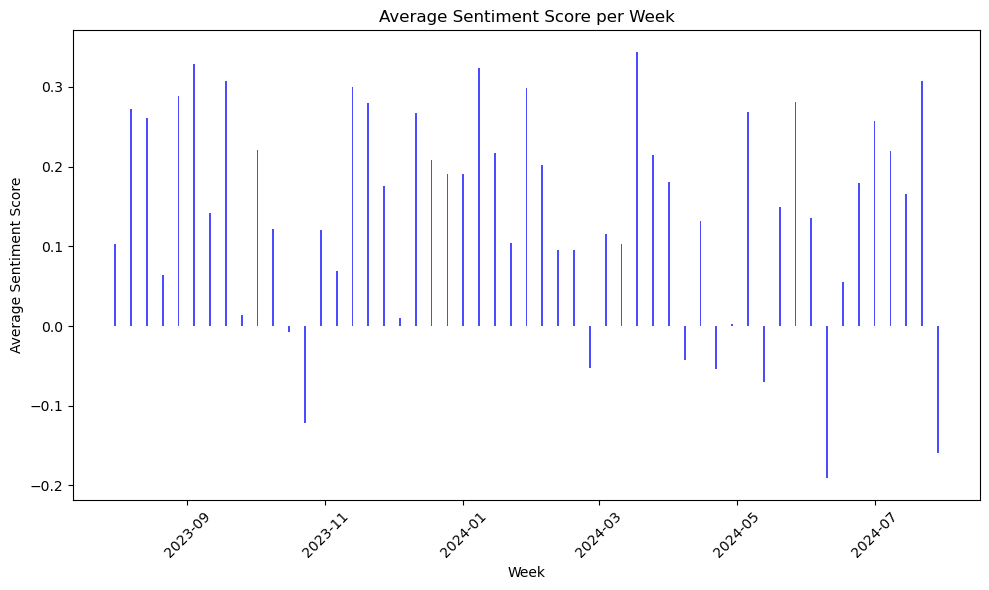

In [86]:
# Step 5.1: Calculate the average sentiment score per week

reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

# Group by week and calculate the average sentiment score
reviews_df['week'] = reviews_df['review_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_sentiment = reviews_df.groupby('week')['sentiment_score'].mean().reset_index()

# Plot a histogram of the average sentiment score per week
plt.figure(figsize=(10, 6))
plt.bar(weekly_sentiment['week'], weekly_sentiment['sentiment_score'], color='blue', alpha=0.7)
plt.title('Average Sentiment Score per Week')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

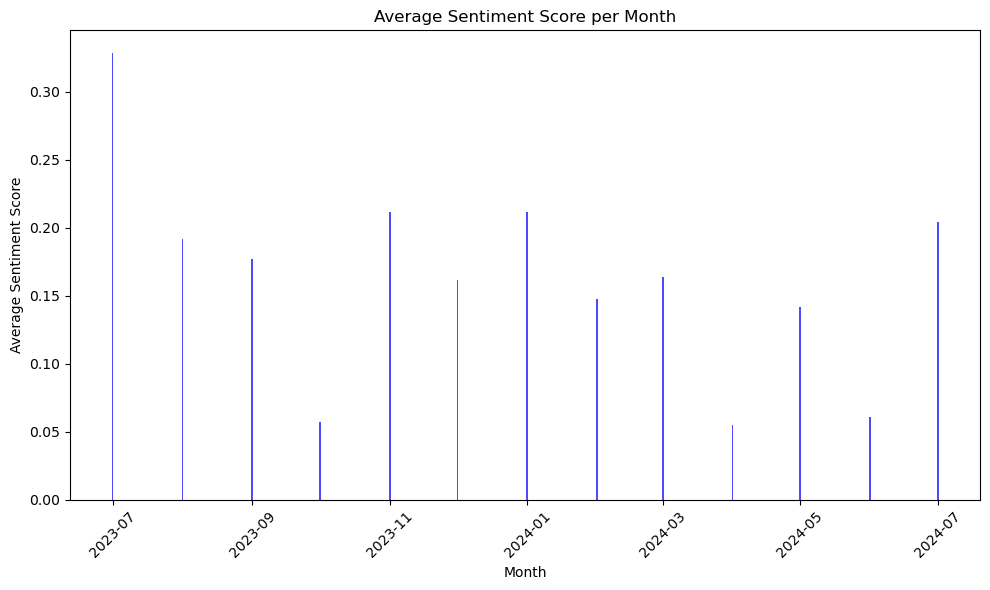

In [98]:
# Step 5.2: Calculate the average sentiment score per month
# Group by month and calculate the average sentiment score
reviews_df['month'] = reviews_df['review_date'].dt.to_period('M').apply(lambda r: r.start_time)
monthly_sentiment = reviews_df.groupby('month')['sentiment_score'].mean().reset_index()

# Plot a histogram of the average sentiment score per month
plt.figure(figsize=(10, 6))
plt.bar(monthly_sentiment['month'], monthly_sentiment['sentiment_score'], color='blue', alpha=0.7)
plt.title('Average Sentiment Score per Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

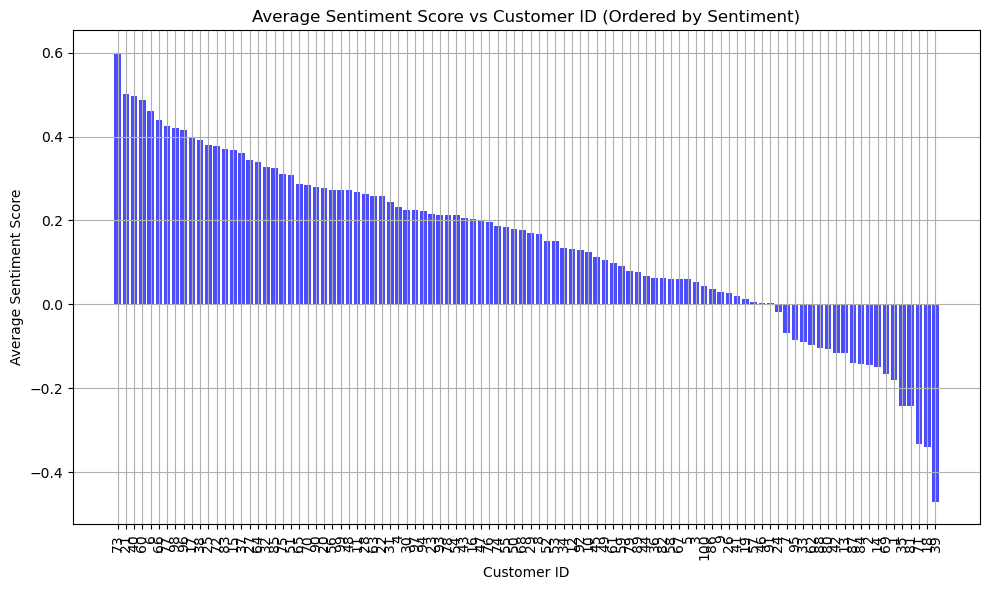

In [101]:
# Step 5.3: Plot the sentiment score vs customer ID
average_sentiment_by_customer = reviews_df.groupby('customer_id')['sentiment_score'].mean().reset_index()
average_sentiment_by_customer = average_sentiment_by_customer.sort_values(by='sentiment_score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_sentiment_by_customer['customer_id'].astype(str), 
        average_sentiment_by_customer['sentiment_score'], 
        color='blue', alpha=0.7)
plt.title('Average Sentiment Score vs Customer ID (Ordered by Sentiment)')
plt.xlabel('Customer ID')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

The majority of customers have an average positive experience

In [112]:
# Step 6: Topic modeling
#   CountVectorizer :: Converts the text data into DTM
#   fit_transform :: Fits the vectorizer to the text data and transforms it into a DTM
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(reviews_df['processed_review_text'])
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for index, topic in enumerate(model.components_):
        # topic.argsort() sorts the words by their importance in the topic 
        topics[index] = [feature_names[i] for i in topic.argsort()[-no_top_words:]]
    return topics

topics = display_topics(lda, vectorizer.get_feature_names_out(), 5)
for topic_idx, topic_words in topics.items():
    print(f"Topic #{topic_idx}: {', '.join(topic_words)}")

Topic #0: took, fine, arrive, work, product
Topic #1: customer, arrived, unhelpful, item, service
Topic #2: buy, recommend, service, quality, product


It could be interesting to merge the customer transactions and customer reviews datasets. To do so, we compare  the customer id columns and the check for the review which happens closest but later to a transaction.

In the following blocks, an initial approximation is presented but the method should be refined.


In [91]:
# Merge the two DataFrames on 'customer_id'
merged_df = pd.merge(df_clean, reviews_df[['customer_id', 'review_date', 'sentiment_score']], on='customer_id', how='left')

# Filter the merged DataFrame to keep only rows where 'review_date' is after 'transaction_date'
merged_df = merged_df[merged_df['review_date'] > merged_df['transaction_date']]

# Sort by 'customer_id' and 'review_date' to get the closest review after each transaction
merged_df = merged_df.sort_values(by=['customer_id', 'transaction_date', 'review_date'])

# Drop duplicates to keep the closest review date for each transaction
merged_df = merged_df.drop_duplicates(subset=['customer_id', 'transaction_date'], keep='first')
# Build the final DataFrame containing all columns from df_clean plus the associated sentiment_score
final_df = df_clean.merge(merged_df[['customer_id', 'transaction_date', 'sentiment_score']], on=['customer_id', 'transaction_date'], how='left')
final_df = final_df.drop(columns=['prev_transaction_date', 'days_between_transactions'])
final_df = final_df.merge(merged_df[['customer_id', 'transaction_date', 'review_date']], on=['customer_id', 'transaction_date'], how='left')


# Display the final DataFrame
final_df.head()

,customer_id,transaction_id,transaction_date,amount,product_category,payment_method,customer_age,customer_income,sentiment_score,review_date
0,1,1506,2023-08-15,1405.225097,clothing,paypal,35,100899.59,-0.0920,2023-10-14
1,1,1946,2023-08-23,1129.749365,electronics,paypal,44,60415.45,-0.0920,2023-10-14
2,1,1917,2023-08-27,1026.126745,groceries,paypal,32,85521.72,-0.0920,2023-10-14
3,1,1154,2023-09-07,976.755069,clothing,debit card,23,73125.47,-0.0920,2023-10-14
4,1,1504,2023-11-12,537.793740,electronics,debit card,46,29220.54,0.1027,2023-12-03


In [102]:
InspectDates = False
if InspectDates == True:
    for index, row in final_df.iterrows():
        print(f"Transaction date: {row['transaction_date'].date()}")
        print(f"Review date: {row['review_date'].date()}")
        print("-" * 50)

# Part 4: Real-world scenario
Consider the following business problem:
Your company wants to improve customer satisfaction by understanding the main topics and sentiments expressed in customer reviews. Your task is to:

- 4.1 Use topic modeling to identify the main topics in the customer reviews.

- 4.2 Summarize the findings and suggest actionable insights for business improvements.

## Topic modelling


The point 4.1 has already being adressed the Part 3 (Step 6: Topic modelling). This has been done using a Latent Dirichlet Allocation (LDA). The 'CountVectorize' function Converts the text data into a document-term matrix (DTM). The parameters used CountVectorizer(max_df=0.9, min_df=2, stop_words='english') are:

- max_df=0.9: Ignores words that appear in more than 90% of the documents, considering them too common to be informative.

- min_df=2: Ignores words that appear in fewer than 2 documents, considering them too rare.

- stop_words='english': Removes common English stop words (like "the", "is", etc.).

Using 'fit_transform', the processed_review_text data is fit to the vectorizer and transformed into a sparse matrix where each element is the frequency of a word in a particular document.

The LDA is a generative probabilistic model that assumes each document is a mixture of topics, and each topic is a mixture of words. It tries to find the underlying topics in the text data. Our parameters lda = LatentDirichletAllocation(n_components=3, random_state=42) are:

- n_components=3: Specifies the number of topics to extract. 

- random_state=42: Sets a seed for reproducibility, so the results are consistent across runs.

With three components, the foudn topics are:

| Topic |        Key words                            |
|:------|:---------------------------------------------:|
| 0     | took, fine, arrive, work, product           |
| 1     | customer, arrived, unhelpful, item, service |
| 2     | buy, recommend, service, quality, product   |
 




If we use other parameters for CountVectorizer and chage the number of topics, other results are obtained

In [129]:
def perform_topic_extraction(reviews, num_topics=3, rnd=42, max_dfs=0.9, min_dfs=2, custom_stop_words = []):
    
    default_stop_words = set(nltk.corpus.stopwords.words('english'))
    combined_stop_words = list(default_stop_words.union(custom_stop_words))
    
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(max_df=max_dfs, min_df=min_dfs, stop_words=combined_stop_words)
    
    # Fit and transform the text data into a document-term matrix
    dtm = vectorizer.fit_transform(reviews['review_text'])
    
    # Apply Latent Dirichlet Allocation
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=rnd)
    lda.fit(dtm)
    
    # Display the topics
    def display_topics(model, feature_names, no_top_words):
        topics = {}
        for index, topic in enumerate(model.components_):
            topics[index] = [feature_names[i] for i in topic.argsort()[-no_top_words:]]
        return topics
    
    topics = display_topics(lda, vectorizer.get_feature_names_out(), 5)
    for topic_idx, topic_words in topics.items():
        print(f"Topic #{topic_idx}: {', '.join(topic_words)}")

In [136]:
perform_topic_extraction(reviews_df, num_topics=4, rnd=27, max_dfs=0.8, min_dfs=4, custom_stop_words = [])
#vectorizer = CountVectorizer(max_df=0.8, min_df=4, stop_words='english')
#dtm = vectorizer.fit_transform(reviews_df['processed_review_text'])
#lda = LatentDirichletAllocation(n_components=4, random_state=27)
#lda.fit(dtm)
#topics = display_topics(lda, vectorizer.get_feature_names_out(), 7)
#for topic_idx, topic_words in topics.items():
#    print(f"Topic #{topic_idx}: {', '.join(topic_words)}")

Topic #0: service, buy, terrible, works, product
Topic #1: excellent, highly, recommend, service, product
Topic #2: customer, damaged, arrived, service, quality
Topic #3: could, improved, acceptable, product, quality



| Topic | Key Workds                                      |
|:------|:-----------------------------------------------:|
| 0     | performance, great, satisfied, quality, product |
| 1     | terrible, buy, product, recommend, service      |
| 2     | long, fine, time, work, product                 |
| 3     | work, perfectly, delivery, fast, product        |

In [137]:
#lda = LatentDirichletAllocation(n_components=5, random_state=3)
#lda.fit(dtm)
#topics = display_topics(lda, vectorizer.get_feature_names_out(), 7)
#for topic_idx, topic_words in topics.items():
#    print(f"Topic #{topic_idx}: {', '.join(topic_words)}")

perform_topic_extraction(reviews_df, num_topics=5, rnd=3, max_dfs=0.8, min_dfs=4, custom_stop_words = [])


Topic #0: took, long, fine, product, quality
Topic #1: fast, perfectly, delivery, works, service
Topic #2: product, excellent, highly, service, recommend
Topic #3: nothing, service, terrible, buy, product
Topic #4: options, available, decent, better, product


Here it can be identified 

| Topic |                              Key Workds                             |         Meaning        |
|-------|:-------------------------------------------------------------------:|:----------------------:|
| 0     | great, performance, satisfied, quality, special, okay, product      | Positive feedback      |
| 1     | recommend, quality, purchase, exceeded, expectation, happy, product | Positive feedback      |
| 2     | decent, available, service, excellent, highly, recommend, product   | Positive feedback      |
| 3     | customer, arrived, improved, acceptable, terrible, buy, service     | Quality / Neg.feedback |
| 4     | long, fine, perfectly, fast, delivery, product, work                | Quality                |


Since words as "customer", "product" or "buy" appear to often, we can create custom_stop_words to remove them from the vectorizer. The probabilistic nature means that LDA does not inherently distinguish between positive and negative sentiments.


In [138]:
custom_stop_words_list = ['product', 'service', 'buy', 'would', 'took', 'item', 'could']

#default_stop_words = set(nltk.corpus.stopwords.words('english'))
#combined_stop_words = list(default_stop_words.union(custom_stop_words))
#vectorizer = CountVectorizer(stop_words=combined_stop_words, max_df=0.6, min_df=4)
#dtm = vectorizer.fit_transform(reviews_df['processed_review_text'])
#lda = LatentDirichletAllocation(n_components=3, random_state=42)
#lda.fit(dtm)
#topics = display_topics(lda, vectorizer.get_feature_names_out(), 7)
#for topic_idx, topic_words in topics.items():
#    print(f"Topic #{topic_idx}: {', '.join(topic_words)}")

perform_topic_extraction(reviews_df, num_topics=3, rnd=42, max_dfs=0.6, min_dfs=4, custom_stop_words = custom_stop_words_list)


Topic #0: amazing, definitely, poor, recommend, quality
Topic #1: damaged, customer, arrived, improved, acceptable
Topic #2: perfectly, fast, delivery, terrible, works



| Topic | Key Workds                                                             |
|-------|------------------------------------------------------------------------|
| 0     | broke, unhappy, amazing, definitely, poor, recommend, quality          |
| 1     | excellent, unhelpful, damaged, customer, arrived, improved, acceptable |
| 2     | decent, available, service, excellent, highly, recommend, product      |
| 3     | long, arrive, perfectly, fast, delivery, terrible, work                |

The mixing of positive and negative feedback within the same topics in LDA is a common issue and can happen due to the nature of how LDA works

The topic modelling could be studied separately for the positive and negative revies. To do so, let's split the reviews_df

In [150]:
reviews_df_positive = reviews_df[reviews_df['sentiment_score'] > 0.55]
#reviews_df_positive[['sentiment_score', 'review_text']].head()

In [151]:
reviews_df_negative = reviews_df[reviews_df['sentiment_score'] < -0.4]
#reviews_df_negative[['sentiment_score', 'review_text']].head()

In [152]:
custom_stop_words_list = ['product', 'service', 'buy', 'would', 'took', 'item', 'could', 'customer']


print("Positive Reviews Topics:")
perform_topic_extraction(reviews_df_positive, custom_stop_words = custom_stop_words_list)

custom_stop_words_list = ['product', 'service', 'buy', 'would', 'took', 'item', 'could', 'customer', 'disappointed']
print("\nNegative Reviews Topics:")
perform_topic_extraction(reviews_df_negative, num_topics=5, custom_stop_words = custom_stop_words_list)
#perform_topic_extraction(reviews_df_negative, num_topics=1, custom_stop_words = custom_stop_words_list)

Positive Reviews Topics:
Topic #0: highly, recommend, excellent, acceptable, improved
Topic #1: fast, works, delivery, perfectly, quality
Topic #2: acceptable, expectations, exceeded, happy, purchase

Negative Reviews Topics:
Topic #0: terrible, described, poor, quality, recommend
Topic #1: arrived, damaged, unhelpful, described, terrible
Topic #2: terrible, described, arrived, damaged, unhelpful
Topic #3: described, broke, one, unhappy, use
Topic #4: arrived, damaged, unhelpful, terrible, described


From a very simple analysis on the topic of the postively ranked reviews, we can see that the positive reviews prise the "quality" and "fast delivery" of the product.
On the other hand, from the negative comments, it can be understood that the customers were disapointed when the product was "broke" or "damaged", it's "quality" was regarded as "poor" or "terrible".

In [158]:
total_entries_pos = len(reviews_df_positive)
phrase_count_fast = reviews_df_positive['review_text'].str.contains("Fast delivery", case=False).sum()

total_entries_neg = len(reviews_df_negative)
phrase_count_service = reviews_df_negative['review_text'].str.contains("customer service was unhelpful", case=False).sum()
phrase_count_description = reviews_df_negative['review_text'].str.contains("not as described", case=False).sum()
phrase_count_dmg = reviews_df_negative['review_text'].str.contains("damaged", case=False).sum()

print(f"Positive comments about fast delivery: {round(float(phrase_count_fast*100/total_entries_pos),2)}%")
print(f"Negative comments about unhelpful service: {round(float(phrase_count_service*100/total_entries_neg),2)}%")
print(f"Negative comments about wrong descriptions: {round(float(phrase_count_description*100/total_entries_neg),2)}%")
print(f"Negative comments about damaged items: {round(float(phrase_count_dmg*100/total_entries_neg),2)}%")




Positive comments about fast delivery: 15.92%
Negative comments about unhelpful service: 22.09%
Negative comments about wrong descriptions: 14.42%
Negative comments about damaged items: 22.09%


## Insights


### Findings

**Positive ::**  Key terms such as "fast", "works", "delivery", "perfectly", "quality" suggest that the positive feedback is focused on fast delivery, the product working perfectly, and the overall quality. The terms acceptable", "expectations", "exceeded", "happy", "purchase" indicate that, in some skituations,the products or services exceeded the customer's expectations.



**Negative ::**  Some customers are highly dissatisfied with the quality of the products, stating that they are poorly made or do not match the descriptions provided (key Terms: "terrible", "described", "poor", "quality", "recommend"). The wide usage of terms such us "arrived", "damaged", "unhelpful", "described", and "terrible" highlights problems with products arriving damaged and customer service being unhelpful in resolving these issues. 
Other issue is that customers are reporting that products are breaking easily, leaving them unhappy with their purchases("broke", "one", "unhappy", "use").

### Actionable Insights for Business Improvement

____
1. Enhance product quality control: 
    - Issue: Discrepancies between product descriptions and what customers receive were reported in 14.42% of negative comments.
    <!-- Consistent complaints about poor product quality and items not matching descriptions. This is mentioned in 14.4% of negative comments. -->

    - Action: Ensure that product descriptions are accurate.  In order to build trust, be transparent about product limitations or potential issues in descriptions.
____
2. Improve shiping process:
    - Issue: Frequent reports of products arriving damaged.

    - Action: Improve the packaging standards to better protect products during shipping.
____
3. Keep the delivery tempos:
    - Issue: Almost 16% of positive comments referred to the fast delivery time.

    - Action: Continue with the current delivery strategy.
    
    
____
4. Revamp customer service training and policies:
    - Issue: 22.1% of negative comments mentioned how unhelpful was customer service.

    - Action: Invest in customer service training focused on empathy, problem-solving, and effective communication. Introduce more customer-friendly return, exchange, and complaint resolution policies to address issues promptly and to customer satisfaction.
____
